# Business Problem Statement:
A group of customers were given an offer in person that they can get a loan at discounted rate and
processing fee will be waived off. A pilot campaign was conducted to get response from customers
whether they are interested in taking out a loan or not. Response was recorded and data was collected.

### Task List

- [x] Build a model to predict whether customers will be interested in taking out a loan or not.
- [x] Identifying features which are most important
- [x] In case of black box models e.g. Random forest use SHAP, LIME to figure out features affecting the target variable
- [x] Try Unsupervised clustering models
- [x] Remove Unnecessary Models from the File
- [x] Generate synthetic data for model.
- [x] Approaching a customer has costs involved with it, hence find the profitable segments so that more customized marketing can be done.
- [x] Need to write inferences what is going on
- [x] Matrix evaluation for all 20% above models 
- [x] KS Scaling
- [x] Variance Inflation Factor (VIF)
- [x] Bucketing Age and SCR
- [x] Business Output

Variables involved: `Customer_id`, `Age`, `Gender`, `Balance`, `Occupation`, `No of Credit transaction`, `SCR`, `Holding period`

## Understanding Complex Variables


- `Holding Period` (How long the customer is able to hold the money in his account.. So, if they have some existing expenses like a loan EMI or any other monthly expense which gets deducted, usually the first week of every month, hence it makes the balance in the account lower during initial days of the month itself.Higher the holding period, more stable their money is in the account.)

- `SCR` SCR is a score given to a customer for a particular product ( in this case loan ) based on certain parameters, to know whether how likely that customer is to buy that product.. so, higher the score, higher the probability, the customer will buy it. SCR propensity of a customer to respond to a digital marketing


## Business Conclusion

#####  HOLDING PERIOD Vs AVG BALANCE

1. The avg holding period and avg balance tend to show high collinearity as they are directly proportional and it can be verified from "Misc_Dash".

2. Self employed class in both genders were able to hold money in their account for a long time resulting in high balance amount.

##### Which Category of Customers Tend to opt for Loans?

Customers with the below traits tend to be inclined towards opting for a loan;

1. Females who own small business/self-owned (SENP) business show higher SCR.

2. Males who are self employed (SELF-EMP) show higher SCR .

3. High SCR's but least holding period i.e. who tend to have EMI's or other deductions from their account.

4. Higher Avg credit transactions shows that the customer is more likely to opt for a loan. As Credit transactions show direct proportionality to SCR values.

##### Final Conclusions

1. From the given data it can be observed that in Females Self Employed tend to be the early bread earners whereas in case of Males Small Business owners tend to be the early bread earners.

2. For both the genders higher avg balance amount is observed in the accounts of Small business owners, second highest avg balance is observed for Professionals (PROF) category customers.


##### Which Category of Customers TEND NOT TO OPT for Loans?

1. In Males, Salaried & Professional class employees tend to not opt for loans as they must have constant inflow of cash.

2. In Females, Professional class employees tend to not opt for loans.

3. In both the genders, customers showing higher holding period tend to not opt for loans as there are less deductions over long time periods.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

### Reading Data from CSV file

In [2]:
data = pd.read_csv('Model_data.csv')

In [3]:
data.Balance = data.Balance.astype('int32') #Truncating decimals

In [4]:
data.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
0,0,41,M,91519,SELF-EMP,38,926,15
1,0,52,M,117288,SAL,17,768,13
2,0,31,F,259827,SENP,8,816,5
3,0,45,F,26677,PROF,14,353,18
4,0,39,F,43440,SENP,1,751,31


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target          20000 non-null  int64 
 1   Age             20000 non-null  int64 
 2   Gender          20000 non-null  object
 3   Balance         20000 non-null  int32 
 4   Occupation      20000 non-null  object
 5   No_OF_CR_TXNS   20000 non-null  int64 
 6   SCR             20000 non-null  int64 
 7   Holding_Period  20000 non-null  int64 
dtypes: int32(1), int64(5), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.086650,38.396200,1.461808e+05,16.653050,557.136050,15.344100
std,0.281329,9.600179,1.698125e+05,12.977704,260.521453,8.952128
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.373650e+04,7.000000,333.000000,8.000000
50%,0.000000,38.000000,7.975550e+04,13.000000,560.000000,16.000000
75%,0.000000,47.000000,2.173100e+05,22.000000,784.000000,23.000000
max,1.000000,55.000000,1.246966e+06,50.000000,999.000000,31.000000


`Gender` and `Occupation` are categorical varibles stored as object type

### ------------------------------------------------------Start of Exploratory Data Analysis-------------------------------------------------------

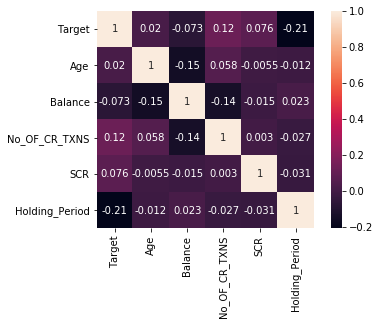

In [7]:
sns.heatmap(data.corr(), annot=True, square=True) # No strong correlations seen overall
plt.show()

###### Inferences: 

- `TARGET` does show maximum correlation w.r.t `No_OF_CR_TXNS` among other variables. Remaining correlations have to be visualized in order to understand if there's any sort of trend in data.

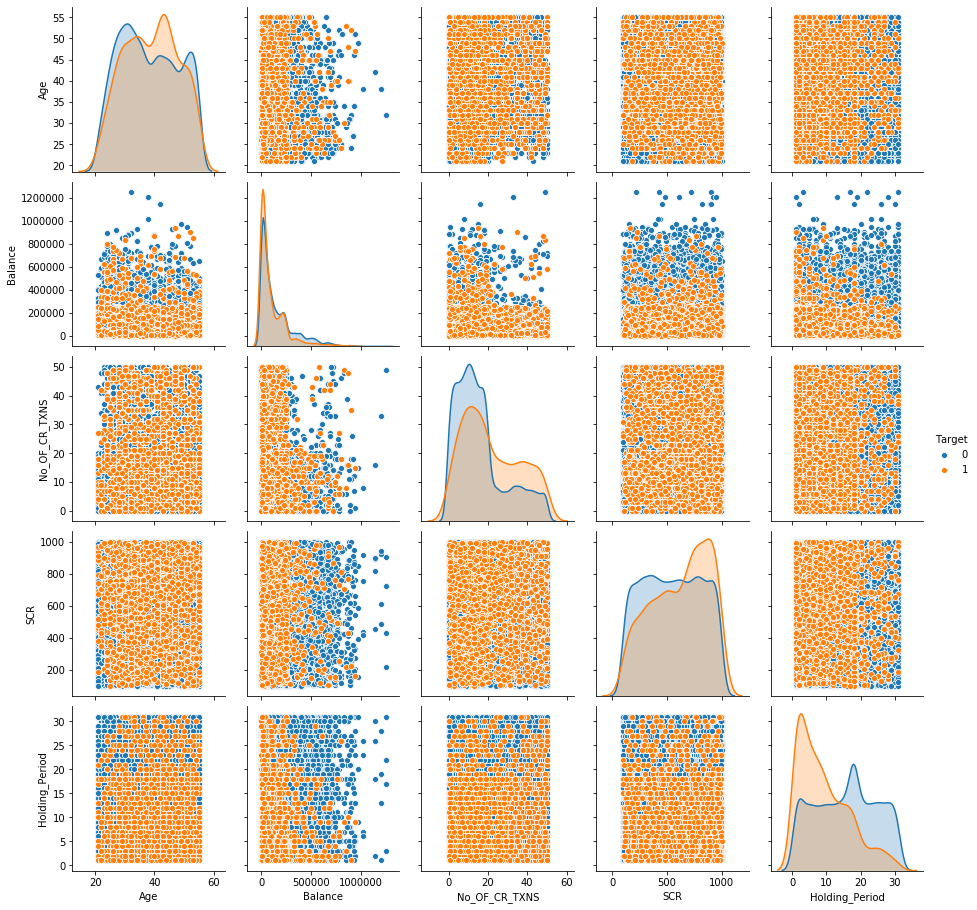

In [8]:
sns.pairplot(data, hue='Target')
plt.show()

##### Inferences from Pair-Plot: 

- People who tend to opt for loan have less `BALANCE` w.r.t people not buying loan.
- People having higher `BALANCE` tend to be in between 35-50 years of `AGE`.
- People having less `BALANCE` tend to show more interest towards loans i.e. higher `SCR` values.
- People having less `BALANCE` tend to have higher `No of Credit transactions` opt for loans.
- People having less `BALANCE` have higher `HOLDING PERIOD` who opt for loans.

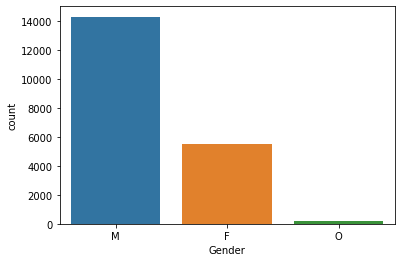

In [9]:
sns.countplot(x = data.Gender)
plt.show()

###### Observation: 

- Since `GENDER` = `"OTHERS"/"O"` has very less population size i.e. less than 1% of entire data hence can be omitted as an attribute from `GENDER` category.

In [10]:
data.drop(data.Gender[data.Gender== 'O'].index, axis = 0, inplace= True) # Removed 196 rows with `Gender` = 'O'

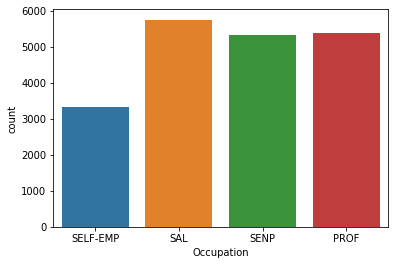

In [11]:
sns.countplot(x = data.Occupation)
plt.show()

###### Inferences: 

- The data consists mostly of `Salaried` category employees, whereas `Business Owners` and `Professionals` occupy the same strength in the data.

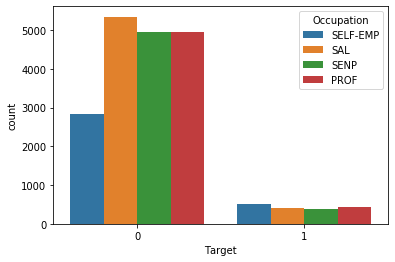

In [12]:
sns.countplot(x=data.Target, hue=data.Occupation) ## Self employed are much more likely to take loans
plt.show()

##### Inferences: 

- Most people who opted for loans tend to be either `Self-Employed` or `Small businesses` whereas `Salaried` people showed quite less interest in taking up loans since they had fixed income.

C:\Users\mazha\anaconda3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


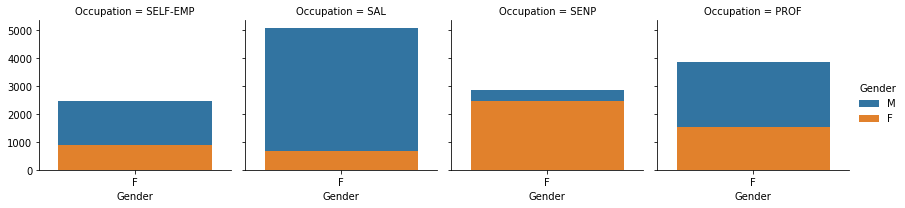

In [13]:
g = sns.FacetGrid(data, col='Occupation', hue="Gender")
plt.grid(True)
g.map(sns.countplot, "Gender", alpha=1)
g.add_legend()
plt.grid((False))

###### Inferences: 

- Most of the `Males` tend to be either in `Salaried` employee class (nearly 85%) or `working professionals` (nearly 70%) whereas most `Women` (nearly 90%) tend to start-up their own `business's` and manage them.

--------------------------

In [14]:
data.No_OF_CR_TXNS.describe()

count    19804.000000
mean        16.563169
std         12.928214
min          0.000000
25%          7.000000
50%         13.000000
75%         21.000000
max         50.000000
Name: No_OF_CR_TXNS, dtype: float64

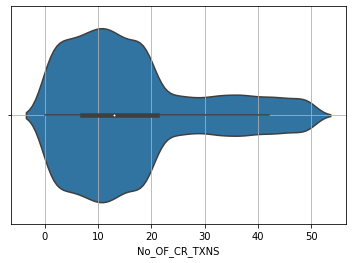

In [15]:
sns.violinplot(x=data.No_OF_CR_TXNS)
plt.grid(True)

###### Inferences: 

- The average `No. of Credit Transactions` tend to be in between 10 and 20. Whereas very few transactions tend to be in the number of 30-50.  

### ------------------------------------------------------End of Exploratory Data Analysis-------------------------------------------------------

### Pretty Report Printing Function

In [16]:
# A class for pretty printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# function for validation on test data   
def classification_report(y_true, y_prediction, type_of_data='Enter Over/Under/Original sampled', type_of_classifier='ClassifierName'):
    """Print Classification report"""
    
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction)
    recall = recall_score(y_true, y_prediction)
    f1 = f1_score(y_true, y_prediction)
    
    print('Classification Report on Testing Data:\n'+ color.BOLD + type_of_data, 'data\n'+color.END+color.RED+color.BOLD+type_of_classifier,'Classifier'+color.END+color.END)
    print()
    print('---------------------------------------')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1 score: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print('---------------------------------------')
    print()


# A function for cross-validation report    
def cross_val_report(classifier, train_data, train_label, cv=10, scoring=['recall','precision', 'f1','accuracy']):
    
    score = cross_validate(classifier, train_data, train_label, cv=cv, scoring= scoring)
    recall = np.mean(score['test_recall'])
    precision = np.mean(score['test_precision'])
    f1 = np.mean(score['test_f1'])
    accuracy= np.mean(score['test_accuracy'])
    print('Cross Validation Report')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print()
    print("*Mean values presented")
    print('---------------------------------------')

### Creating the first set of training and test data on imbalanced data

In [17]:
df = pd.get_dummies(data, columns=['Gender','Occupation'], drop_first = True)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,0,41,91519,38,926,15,1,0,1,0
1,0,52,117288,17,768,13,1,1,0,0
2,0,31,259827,8,816,5,0,0,0,1
3,0,45,26677,14,353,18,0,0,0,0
4,0,39,43440,1,751,31,0,0,0,1


#### Splitting data for training, testing

In [18]:
X_original = df.iloc[:,1:]
y_original = df.iloc[:,0]

In [19]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original,y_original, shuffle = ['True'], stratify=y_original)
X_test_orig.reset_index(inplace = True, drop=True)
y_test_orig.reset_index(inplace = True, drop=True)

#### Creating Synthetic data for Model Exploration

In [20]:
X_under_train, y_under_train = NearMiss().fit_resample(X_train_orig, y_train_orig)
X_over_train, y_over_train = SMOTE().fit_resample(X_train_orig, y_train_orig)

### ------------------------------------------------------Start of Model Exploration---------------------------------------------------------------

---------------

## RandomForest Classifier - Undersampled Data

Classification Report on Testing Data:
Undersampled data
Random Forest Classifier

---------------------------------------
Recall: 0.8266978922716628
Precision: 0.10493460166468489
F1 score: 0.1862305460300712
Accuracy: 0.37689355685720055
---------------------------------------

Cross Validation Report
Recall: 0.7847202034883721
Precision: 0.7966314291347599
F1: 0.7890136463895954
Accuracy: 0.7897738326848249

*Mean values presented
---------------------------------------


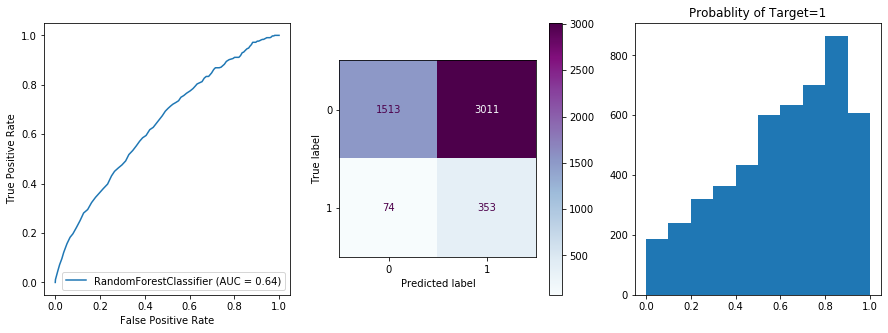

In [21]:
clf_rf1 = RandomForestClassifier()
clf_rf1.fit(X_under_train, y_under_train)
y_predict= clf_rf1.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Undersampled', 'Random Forest')
cross_val_report(clf_rf1, X_under_train, y_under_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(clf_rf1, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(clf_rf1, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = clf_rf1.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

In [22]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<=0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['na_label'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift'] = ks_table['na_label']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,na_label,lift
0,10,440,84,356,19.090909,80.909091,440,84,356,23.796034,7.742497,16.053537,19.090909,2.677595
1,9,520,63,457,12.115385,87.884615,960,147,813,41.643059,17.681601,23.961459,15.312500,2.147654
2,8,514,51,463,9.922179,90.077821,1474,198,1276,56.090652,27.751196,28.339455,13.432836,1.884022
3,7,475,46,429,9.684211,90.315789,1949,244,1705,69.121813,37.081340,32.040473,12.519241,1.755886
4,6,502,44,458,8.764940,91.235060,2451,288,2163,81.586402,47.042192,34.544210,11.750306,1.648039
5,5,470,35,435,7.446809,92.553191,2921,323,2598,91.501416,56.502827,34.998589,11.057857,1.550919
6,4,535,30,505,5.607477,94.392523,3456,353,3103,100.000000,67.485863,32.514137,10.214120,1.432581
7,3,484,0,484,0.000000,100.000000,3940,353,3587,100.000000,78.012179,21.987821,8.959391,1.256599
8,2,498,0,498,0.000000,100.000000,4438,353,4085,100.000000,88.842975,11.157025,7.954033,1.115593
9,1,513,0,513,0.000000,100.000000,4951,353,4598,100.000000,100.000000,0.000000,7.129873,1.000000


### Gain Chart

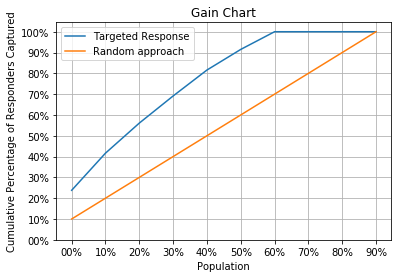

In [23]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Targeted Response')
plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)+'0%') for i in list(range(0,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('Gain Chart')
plt.ylabel('Cumulative Percentage of Responders Captured')
plt.xlabel('Population')
plt.legend()
plt.grid()
plt.show()

### Lift Chart

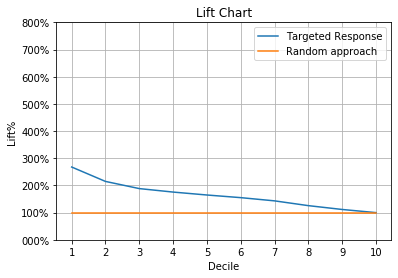

In [24]:
plt.plot([i for i in range(1,11)],ks_table.lift*100, label = 'Targeted Response')
plt.plot([i for i in range(1,11)], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 900, 100), labels=[(str(i)+'00%') for i in list(range(0,11))])

plt.title('Lift Chart')
plt.ylabel('Lift%')
plt.xlabel('Decile')
plt.legend()
plt.grid()

plt.show()

### KS chart

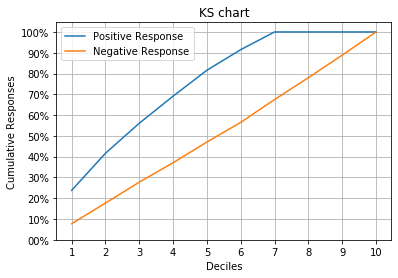

In [25]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Positive Response')
plt.plot([i for i in range(1,11)],ks_table['cum_non_resp%'], label = 'Negative Response')
# plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Negative')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('KS chart')
plt.ylabel('Cumulative Responses')
plt.xlabel('Deciles')
plt.legend()
plt.grid()
plt.show()

-------------

## RandomForest Classifier - Oversampled Data

Classification Report on Testing Data:
Oversampled data
Random Forest Classifier

---------------------------------------
Recall: 0.3864168618266979
Precision: 0.24052478134110788
F1 score: 0.29649595687331537
Accuracy: 0.8418501312866088
---------------------------------------

Cross Validation Report
Recall: 0.9146683373073454
Precision: 0.8827831934561425
F1: 0.896118421097016
Accuracy: 0.8972488739243076

*Mean values presented
---------------------------------------


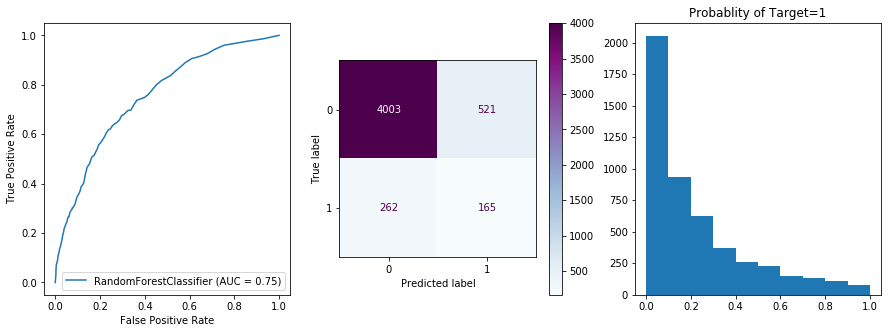

In [26]:
clf_rf2 = RandomForestClassifier()
clf_rf2.fit(X_over_train, y_over_train)
y_predict= clf_rf2.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Oversampled', 'Random Forest')

cross_val_report(clf_rf2, X_over_train, y_over_train)



fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(clf_rf2, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(clf_rf2, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = clf_rf2.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

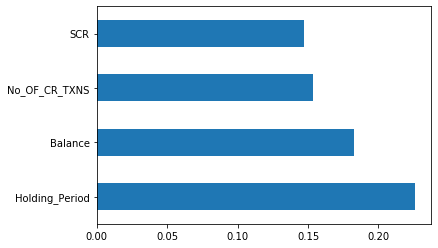

In [27]:
(pd.Series(clf_rf2.feature_importances_, index=X_test_orig.columns)
   .nlargest(4)
   .plot(kind='barh'))
plt.show()

### Rank Ordering Stats for Random Forest - Oversampled Data

In [28]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<=0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['na_label'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift'] = ks_table['na_label']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,na_label,lift
0,10,485,129,356,26.597938,73.402062,485,129,356,78.181818,7.438362,70.743456,26.597938,7.980993
1,9,485,36,449,7.422680,92.577320,970,165,805,100.000000,16.819891,83.180109,17.010309,5.104124
2,8,500,0,500,0.000000,100.000000,1470,165,1305,100.000000,27.267029,72.732971,11.224490,3.368027
3,7,496,0,496,0.000000,100.000000,1966,165,1801,100.000000,37.630589,62.369411,8.392675,2.518311
4,6,428,0,428,0.000000,100.000000,2394,165,2229,100.000000,46.573339,53.426661,6.892231,2.068087
5,5,503,0,503,0.000000,100.000000,2897,165,2732,100.000000,57.083159,42.916841,5.695547,1.709009
6,4,562,0,562,0.000000,100.000000,3459,165,3294,100.000000,68.825742,31.174258,4.770165,1.431339
7,3,367,0,367,0.000000,100.000000,3826,165,3661,100.000000,76.493941,23.506059,4.312598,1.294041
8,2,483,0,483,0.000000,100.000000,4309,165,4144,100.000000,86.585875,13.414125,3.829195,1.148990
9,1,642,0,642,0.000000,100.000000,4951,165,4786,100.000000,100.000000,0.000000,3.332660,1.000000


### Gain Chart

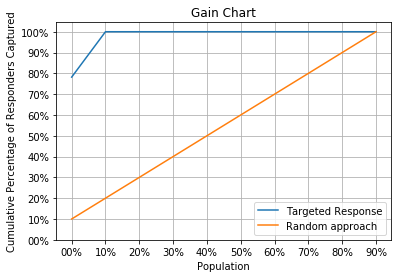

In [29]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Targeted Response')
plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)+'0%') for i in list(range(0,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('Gain Chart')
plt.ylabel('Cumulative Percentage of Responders Captured')
plt.xlabel('Population')
plt.legend()
plt.grid()
plt.show()

### Lift Chart

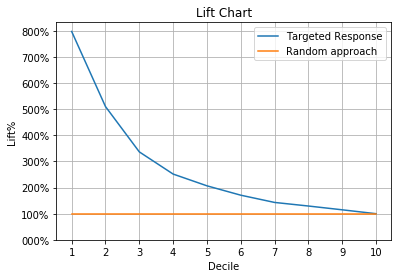

In [30]:
plt.plot([i for i in range(1,11)],ks_table.lift*100, label = 'Targeted Response')
plt.plot([i for i in range(1,11)], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 900, 100), labels=[(str(i)+'00%') for i in list(range(0,11))])

plt.title('Lift Chart')
plt.ylabel('Lift%')
plt.xlabel('Decile')
plt.legend()
plt.grid()

plt.show()

### KS chart

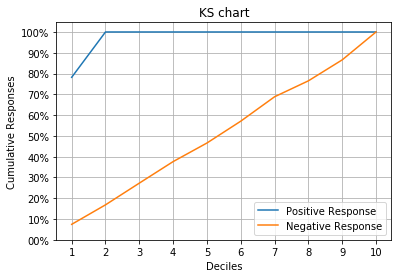

In [31]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Positive Response')
plt.plot([i for i in range(1,11)],ks_table['cum_non_resp%'], label = 'Negative Response')
# plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Negative')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('KS chart')
plt.ylabel('Cumulative Responses')
plt.xlabel('Deciles')
plt.legend()
plt.grid()
plt.show()

## Logistic Regression - Undersampled Data

Classification Report on Testing Data:
Undersampled data
Logistic Regression Classifier

---------------------------------------
Recall: 0.702576112412178
Precision: 0.13767783386874713
F1 score: 0.23023791250959327
Accuracy: 0.5948293274086043
---------------------------------------

Cross Validation Report
Recall: 0.6926538275193799
Precision: 0.6711699515988401
F1: 0.6810456747761484
Accuracy: 0.6751413545719844

*Mean values presented
---------------------------------------


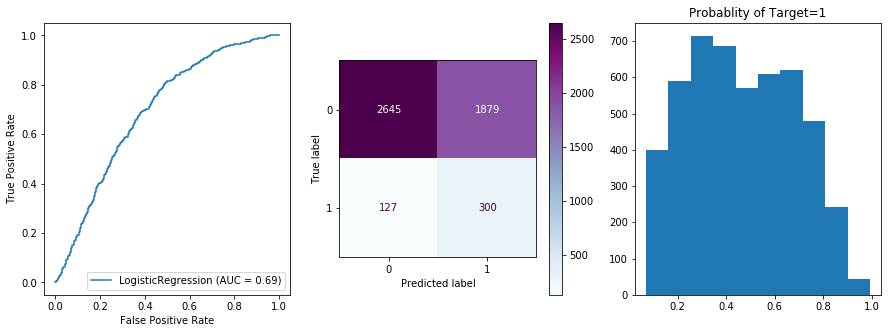

In [32]:
lr1 = LogisticRegression(max_iter=150)
lr1.fit(X_under_train, y_under_train)
y_predict= lr1.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Undersampled', 'Logistic Regression')

cross_val_report(lr1, X_under_train, y_under_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr1, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr1, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr1.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

### Rank Ordering Stats for Logistic Regression - Undersampled Data

In [33]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<=0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['na_label'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift'] = ks_table['na_label']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,na_label,lift
0,10,495,78,417,15.757576,84.242424,495,78,417,26.000000,8.965814,17.034186,15.757576,2.600525
1,9,495,85,410,17.171717,82.828283,990,163,827,54.333333,17.781122,36.552211,16.464646,2.717215
2,8,495,69,426,13.939394,86.060606,1485,232,1253,77.333333,26.940443,50.392890,15.622896,2.578299
3,7,495,56,439,11.313131,88.686869,1980,288,1692,96.000000,36.379273,59.620727,14.545455,2.400485
4,6,495,12,483,2.424242,97.575758,2475,300,2175,100.000000,46.764137,53.235863,12.121212,2.000404
5,5,495,0,495,0.000000,100.000000,2970,300,2670,100.000000,57.407009,42.592991,10.101010,1.667003
6,4,495,0,495,0.000000,100.000000,3465,300,3165,100.000000,68.049882,31.950118,8.658009,1.428860
7,3,495,0,495,0.000000,100.000000,3960,300,3660,100.000000,78.692754,21.307246,7.575758,1.250253
8,2,495,0,495,0.000000,100.000000,4455,300,4155,100.000000,89.335627,10.664373,6.734007,1.111336
9,1,496,0,496,0.000000,100.000000,4951,300,4651,100.000000,100.000000,0.000000,6.059382,1.000000


### Gain Chart

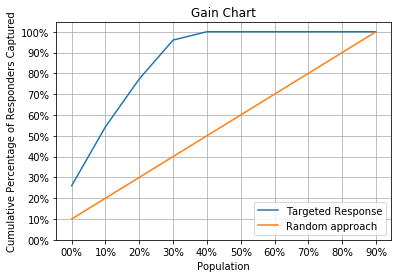

In [34]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Targeted Response')
plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)+'0%') for i in list(range(0,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('Gain Chart')
plt.ylabel('Cumulative Percentage of Responders Captured')
plt.xlabel('Population')
plt.legend()
plt.grid()
plt.show()

### Lift Chart

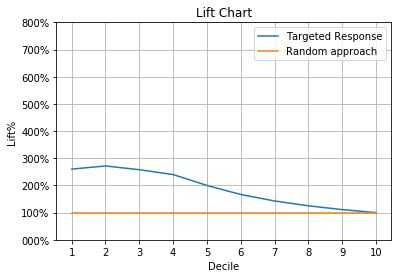

In [35]:
plt.plot([i for i in range(1,11)],ks_table.lift*100, label = 'Targeted Response')
plt.plot([i for i in range(1,11)], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 900, 100), labels=[(str(i)+'00%') for i in list(range(0,11))])

plt.title('Lift Chart')
plt.ylabel('Lift%')
plt.xlabel('Decile')
plt.legend()
plt.grid()

plt.show()

### KS chart

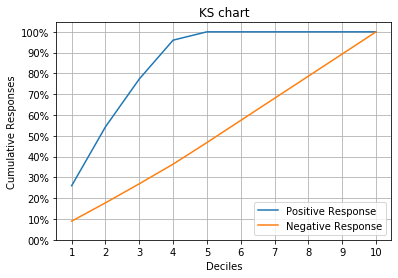

In [36]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Positive Response')
plt.plot([i for i in range(1,11)],ks_table['cum_non_resp%'], label = 'Negative Response')
# plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Negative')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('KS chart')
plt.ylabel('Cumulative Responses')
plt.xlabel('Deciles')
plt.legend()
plt.grid()
plt.show()

## Logistic Regression - Oversampled Data

Classification Report on Testing Data:
Oversampled data
Logistic Regression Classifier

---------------------------------------
Recall: 0.7213114754098361
Precision: 0.17130144605116795
F1 score: 0.27685393258426966
Accuracy: 0.6750151484548575
---------------------------------------

Cross Validation Report
Recall: 0.7186640916081237
Precision: 0.6993258046599733
F1: 0.7083029863704986
Accuracy: 0.7048869717215557

*Mean values presented
---------------------------------------


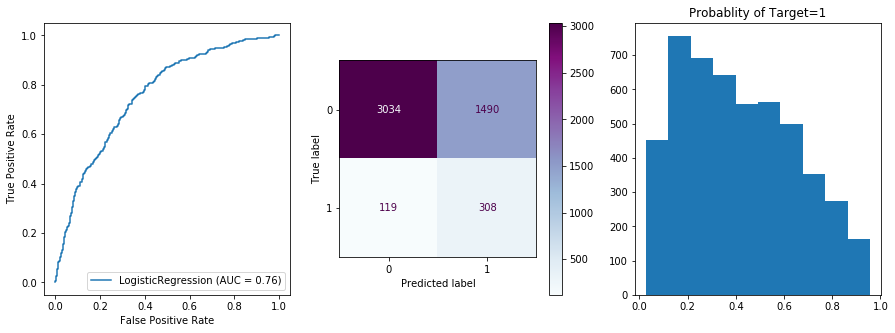

In [37]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(X_over_train, y_over_train)
y_predict= lr2.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Oversampled', 'Logistic Regression')

cross_val_report(lr2, X_over_train, y_over_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr2, X_test_orig, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr2, X_test_orig, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr2.predict_proba(X_test_orig)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

### Rank Ordering Stats for Logistic Regression - Oversampled Data

In [38]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<=0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['na_label'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift'] = ks_table['na_label']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,na_label,lift
0,10,495,139,356,28.080808,71.919192,495,139,356,45.129870,7.667456,37.462414,28.080808,4.513899
1,9,495,69,426,13.939394,86.060606,990,208,782,67.532468,16.842559,50.689909,21.010101,3.377306
2,8,495,61,434,12.323232,87.676768,1485,269,1216,87.337662,26.189963,61.147699,18.114478,2.911844
3,7,495,39,456,7.878788,92.121212,1980,308,1672,100.000000,36.011200,63.988800,15.555556,2.500505
4,6,495,0,495,0.000000,100.000000,2475,308,2167,100.000000,46.672410,53.327590,12.444444,2.000404
5,5,495,0,495,0.000000,100.000000,2970,308,2662,100.000000,57.333621,42.666379,10.370370,1.667003
6,4,495,0,495,0.000000,100.000000,3465,308,3157,100.000000,67.994831,32.005169,8.888889,1.428860
7,3,495,0,495,0.000000,100.000000,3960,308,3652,100.000000,78.656041,21.343959,7.777778,1.250253
8,2,495,0,495,0.000000,100.000000,4455,308,4147,100.000000,89.317252,10.682748,6.913580,1.111336
9,1,496,0,496,0.000000,100.000000,4951,308,4643,100.000000,100.000000,0.000000,6.220965,1.000000


### Gain Chart

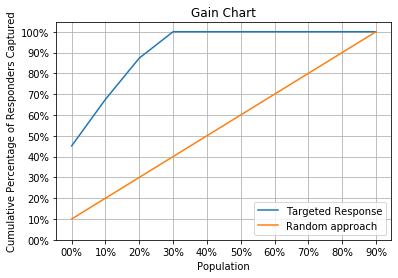

In [39]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Targeted Response')
plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)+'0%') for i in list(range(0,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('Gain Chart')
plt.ylabel('Cumulative Percentage of Responders Captured')
plt.xlabel('Population')
plt.legend()
plt.grid()
plt.show()

### Lift Chart

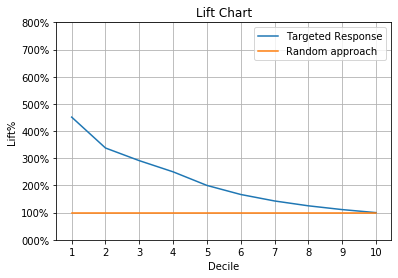

In [40]:
plt.plot([i for i in range(1,11)],ks_table.lift*100, label = 'Targeted Response')
plt.plot([i for i in range(1,11)], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 900, 100), labels=[(str(i)+'00%') for i in list(range(0,11))])

plt.title('Lift Chart')
plt.ylabel('Lift%')
plt.xlabel('Decile')
plt.legend()
plt.grid()

plt.show()

### KS chart

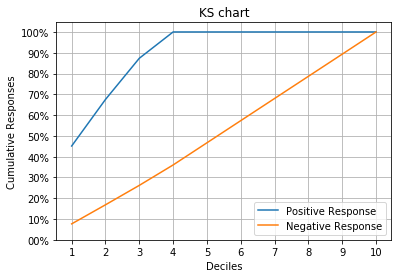

In [41]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Positive Response')
plt.plot([i for i in range(1,11)],ks_table['cum_non_resp%'], label = 'Negative Response')
# plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Negative')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('KS chart')
plt.ylabel('Cumulative Responses')
plt.xlabel('Deciles')
plt.legend()
plt.grid()
plt.show()

-----------------

### Final Model  
On examining the Logistic Regression Models, it is found that `Variance Inflation Factor` is high for `age` indicating that it is not a useful feature  
A new Logistic Regression Model is made without the `age` variable and with normalized data, to examine feature importance  

This model captures all prospective loan targets within the first three deciles

## Logistic Regression - Normalized Oversampled Data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaled_train, scaled_test = X_over_train.copy(), X_test_orig.copy()
scaled_train, scaled_test = scaled_train.iloc[:,1:], scaled_test.iloc[:,1:]

In [44]:
for i in X_over_train.columns[1:5]:
    ss = StandardScaler()
    scaled_train[i] = ss.fit_transform(scaled_train[[i]])
    scaled_test[i] = ss.transform(scaled_test[[i]])

Classification Report on Testing Data:
Oversampled Normalized data
Logistic Regression Classifier

---------------------------------------
Recall: 0.5644028103044496
Precision: 0.17971662938105892
F1 score: 0.2726244343891403
Accuracy: 0.7402544940416077
---------------------------------------

Cross Validation Report
Recall: 0.7764328963547981
Precision: 0.757032208180798
F1: 0.764864776844955
Accuracy: 0.7649071521922342

*Mean values presented
---------------------------------------


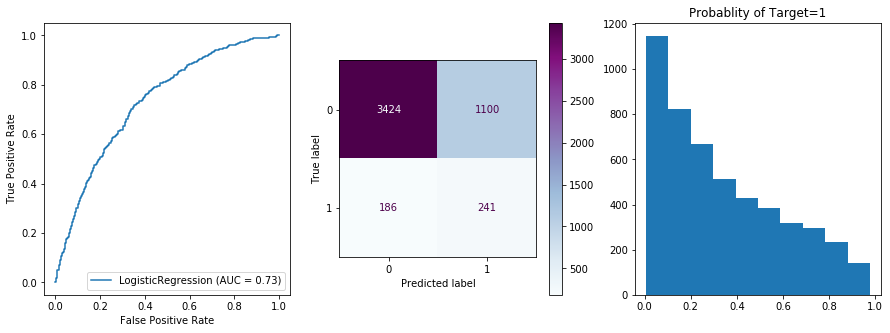

In [45]:
lr3 = LogisticRegression(max_iter=500)
lr3.fit(scaled_train, y_over_train)
y_predict= lr3.predict(scaled_test)
classification_report(y_test_orig, y_predict, 'Oversampled Normalized', 'Logistic Regression')

cross_val_report(lr3, scaled_train, y_over_train)

fig, axs = plt.subplots(1,3, figsize=(15,5))
plot_roc_curve(lr3, scaled_test, y_test_orig, ax=axs[0])
plot_confusion_matrix(lr3, scaled_test, y_test_orig, cmap='BuPu', ax=axs[1])

proba = lr3.predict_proba(scaled_test)[:,1]
axs[2].hist(proba)
axs[2].set_title('Probablity of Target=1')
plt.show()

### Coefficients of the Model 

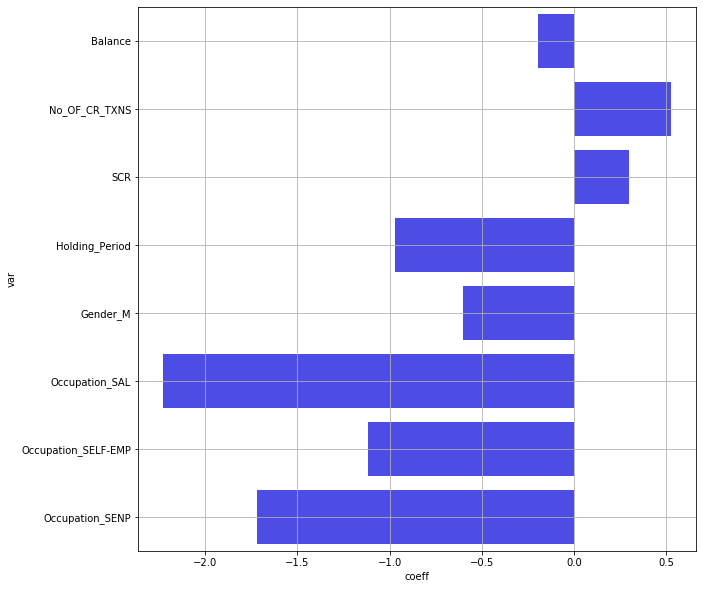

In [46]:
importance = pd.DataFrame({'var': scaled_train.columns, 'coeff':[i for i in lr3.coef_[0,:]]})
plt.figure(figsize=(10,10))
sns.barplot(x="coeff", y="var", data=importance, color='blue',alpha = 0.8)
plt.grid()
plt.show()

### Rank Ordering Stats for Logistic Regression - Oversampled Data

In [47]:
proba_df = pd.DataFrame(proba, columns=['Probablity'])
proba_df['present_decile'] = pd.qcut(proba_df.Probablity, 10, labels=[str(i+1) for i in range(10)])
proba_df.present_decile = proba_df.present_decile.astype(int)

proba_df['response_test'] = y_test_orig
proba_df['response_model'] = proba_df['Probablity'].apply(lambda x: 0 if x<=0.5 else 1)
proba_df['correct_loan_prediction'] = 0
for ind, row in proba_df.iterrows():
    if row['response_test'] == row['response_model'] == 1:
        proba_df.loc[ind, 'correct_loan_prediction'] =1


ks_table = pd.DataFrame({'Decile':[j for j in range(10,0,-1)]})

ks_table['base'] =0
ks_table['responses'] =0
ks_table['non_responses'] =0
for ind, row in ks_table.iterrows():
    ks_table.loc[ind, 'base'] = proba_df[proba_df.present_decile==row['Decile']].shape[0]
    
    try:
        correct_loan_prediction1 = proba_df[proba_df.present_decile==row['Decile']].correct_loan_prediction.value_counts()[1]
    except:
        correct_loan_prediction1 = 0
        
    ks_table.loc[ind, 'responses'] = correct_loan_prediction1
    
ks_table['non_responses'] = ks_table['base'] - ks_table['responses']
    
ks_table['resp_rate'] = ks_table['responses']/ks_table['base']*100
ks_table['non_resp_rate'] = ks_table['non_responses']/ks_table['base']*100

ks_table['cum_base'] = ks_table.base.cumsum()
ks_table['cum_resp'] = ks_table.responses.cumsum()
ks_table['cum_non_resp'] = ks_table.non_responses.cumsum()

ks_table['cum_resp%'] = ks_table['cum_resp']/ks_table['cum_resp'].max()*100
ks_table['cum_non_resp%'] = ks_table['cum_non_resp']/ks_table['cum_non_resp'].max()*100
ks_table['ks'] = ks_table['cum_resp%']-ks_table['cum_non_resp%']

ks_table['na_label'] = ks_table['cum_resp']/ks_table['cum_base']*100
ks_table['lift'] = ks_table['na_label']/(100*ks_table['cum_resp'].max()/ks_table['cum_base'].max())

ks_table

,Decile,base,responses,non_responses,resp_rate,non_resp_rate,cum_base,cum_resp,cum_non_resp,cum_resp%,cum_non_resp%,ks,na_label,lift
0,10,495,112,383,22.626263,77.373737,495,112,383,46.473029,8.131635,38.341394,22.626263,4.648242
1,9,495,91,404,18.383838,81.616162,990,203,787,84.232365,16.709130,67.523236,20.505051,4.212469
2,8,495,38,457,7.676768,92.323232,1485,241,1244,100.000000,26.411890,73.588110,16.228956,3.334007
3,7,495,0,495,0.000000,100.000000,1980,241,1739,100.000000,36.921444,63.078556,12.171717,2.500505
4,6,495,0,495,0.000000,100.000000,2475,241,2234,100.000000,47.430998,52.569002,9.737374,2.000404
5,5,495,0,495,0.000000,100.000000,2970,241,2729,100.000000,57.940552,42.059448,8.114478,1.667003
6,4,495,0,495,0.000000,100.000000,3465,241,3224,100.000000,68.450106,31.549894,6.955267,1.428860
7,3,495,0,495,0.000000,100.000000,3960,241,3719,100.000000,78.959660,21.040340,6.085859,1.250253
8,2,495,0,495,0.000000,100.000000,4455,241,4214,100.000000,89.469214,10.530786,5.409652,1.111336
9,1,496,0,496,0.000000,100.000000,4951,241,4710,100.000000,100.000000,0.000000,4.867703,1.000000


### Gain Chart

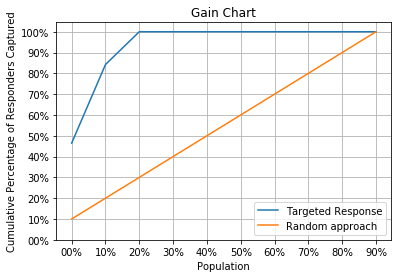

In [48]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Targeted Response')
plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)+'0%') for i in list(range(0,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('Gain Chart')
plt.ylabel('Cumulative Percentage of Responders Captured')
plt.xlabel('Population')
plt.legend()
plt.grid()
plt.show()

### Lift Chart

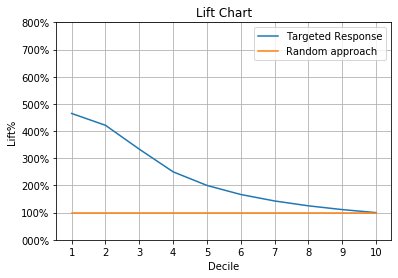

In [49]:
plt.plot([i for i in range(1,11)],ks_table.lift*100, label = 'Targeted Response')
plt.plot([i for i in range(1,11)], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], label = 'Random approach')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 900, 100), labels=[(str(i)+'00%') for i in list(range(0,11))])

plt.title('Lift Chart')
plt.ylabel('Lift%')
plt.xlabel('Decile')
plt.legend()
plt.grid()

plt.show()

### KS chart

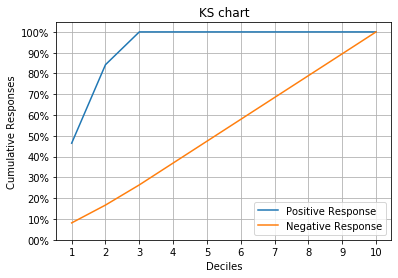

In [50]:
plt.plot([i for i in range(1,11)],ks_table['cum_resp%'], label = 'Positive Response')
plt.plot([i for i in range(1,11)],ks_table['cum_non_resp%'], label = 'Negative Response')
# plt.plot([i for i in range(1,11)], np.arange(0, 110, 10)[1:], label = 'Negative')

plt.xticks(np.arange(1, 11), labels=[(str(i)) for i in list(range(1,11))])
plt.yticks(np.arange(0, 110, 10), labels=[(str(i)+'0%') for i in list(range(0,11))])

plt.title('KS chart')
plt.ylabel('Cumulative Responses')
plt.xlabel('Deciles')
plt.legend()
plt.grid()
plt.show()

### ------------------------------------------------------End of Model Exploration---------------------------------------------------------------

### PRE-BUCKETING VISUALIZATIONS FOR INFERENCES

### SCR Vs Occupation Vs Target

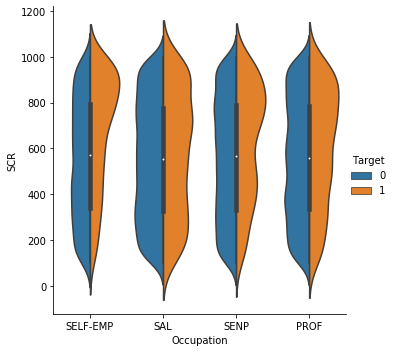

In [51]:
sns.catplot(x="Occupation", y="SCR", hue = "Target",data=data, kind = "violin", split = True)
plt.show()

##### Inferences: 

- `SELF-EMP` class tends to have more `SCR` values who are likely to opt for loans.
- `SAL` class shows uniformity across `SCR` for people opting/not opting for loans.
- `SENP` business class tend to show similar fashion like `SELF-EMP` class when it comes to opting for loans.
- `PROF` class tends to lie somewhere between `SENP` and `SAL` class.

### SCR Vs Occupation Vs Target

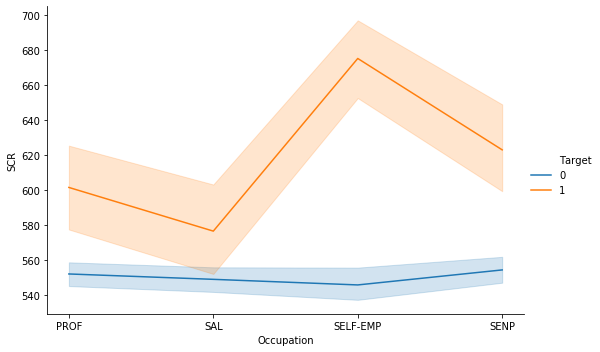

In [52]:
sns.relplot(x="Occupation", y="SCR", hue = "Target",data=data, aspect=1.5, kind = "line")
plt.show()

### SCR Vs Occupation Vs Target

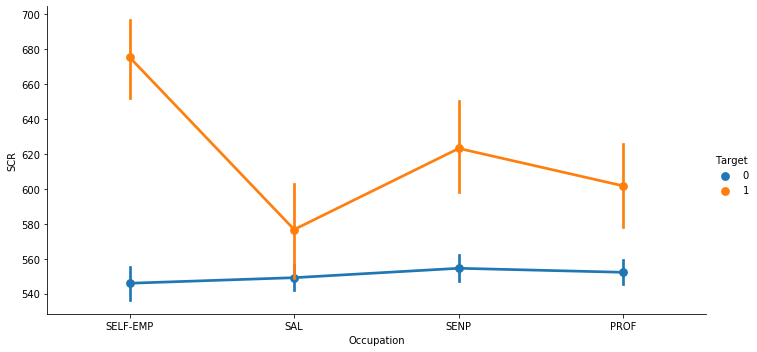

In [53]:
sns.catplot(x="Occupation", y="SCR", hue = "Target",data=data, aspect=2.0, kind = "point")
plt.show()

##### Inferences: 

- `SELF-EMP`class, there can be seen a high `SCR` value ranging between 660 to 700 points who have shown interest in opting for loans whereas least interest in the same class was shown at 540 to 550 points of `SCR`

- `SENP` class. are the second in line to opt for Loans, as they tend to show comaratively hgiher `SCR` values in the line graph above.

In [54]:
data1 = data.copy()

### Bucketing for AGE values

#### Creating 4 buckets for age variable

In [55]:
data1['Ageb'] = pd.qcut(data['Age'], q=4)

In [56]:
data1.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period,Ageb
0,0,41,M,91519,SELF-EMP,38,926,15,"(38.0, 46.0]"
1,0,52,M,117288,SAL,17,768,13,"(46.0, 55.0]"
2,0,31,F,259827,SENP,8,816,5,"(30.0, 38.0]"
3,0,45,F,26677,PROF,14,353,18,"(38.0, 46.0]"
4,0,39,F,43440,SENP,1,751,31,"(38.0, 46.0]"


#### AGE Intervals

In [57]:
data1.Ageb.value_counts()

(30.0, 38.0]      5188
(20.999, 30.0]    5136
(46.0, 55.0]      4936
(38.0, 46.0]      4544
Name: Ageb, dtype: int64

In [58]:
data1.dtypes

Target               int64
Age                  int64
Gender              object
Balance              int32
Occupation          object
No_OF_CR_TXNS        int64
SCR                  int64
Holding_Period       int64
Ageb              category
dtype: object

In [59]:
data1.Ageb

0          (38.0, 46.0]
1          (46.0, 55.0]
2          (30.0, 38.0]
3          (38.0, 46.0]
4          (38.0, 46.0]
              ...      
19995    (20.999, 30.0]
19996      (30.0, 38.0]
19997      (38.0, 46.0]
19998      (30.0, 38.0]
19999      (30.0, 38.0]
Name: Ageb, Length: 19804, dtype: category
Categories (4, interval[float64]): [(20.999, 30.0] < (30.0, 38.0] < (38.0, 46.0] < (46.0, 55.0]]

In [60]:
# sns.pairplot(data1, hue='Target')

In [61]:
data1 = pd.get_dummies(data1)
data2 = data1.copy()

### Age Bucket Ranking Function

In [62]:
cols = ['Ageb_(30.0, 38.0]', 'Ageb_(20.999, 30.0]','Ageb_(46.0, 55.0]','Ageb_(38.0, 46.0]']

def func1(x):
    if x ==1:
        return 1
def func2(x):
    if x ==1:
        return 2

def func3(x):
    if x ==1:
        return 3

def func4(x):
    if x ==1:
        return 4


data1['age_d'] = data1['Ageb_(30.0, 38.0]'].apply(func1)
data1['age_d'] = data1['Ageb_(20.999, 30.0]'].apply(func2)
data1['age_d'] = data1['Ageb_(46.0, 55.0]'].apply(func3)
data1['age_d'] = data1['Ageb_(38.0, 46.0]'].apply(func4)

In [63]:
for ind, row in data1.iterrows():
    if row['Ageb_(20.999, 30.0]'] ==1:
        data1.loc[ind, 'age_d'] = 1
    elif row['Ageb_(30.0, 38.0]'] ==1:
        data1.loc[ind, 'age_d'] = 2
    elif row['Ageb_(38.0, 46.0]'] ==1:
        data1.loc[ind, 'age_d'] = 3
    elif row['Ageb_(46.0, 55.0]'] ==1:
        data1.loc[ind, 'age_d'] = 4

In [64]:
data1.age_d.value_counts()

2.0    5188
1.0    5136
4.0    4936
3.0    4544
Name: age_d, dtype: int64

#### Converting Age buckets to integer type

In [65]:
data1.age_d = data1.age_d.astype('int32')
data1.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,"Ageb_(20.999, 30.0]","Ageb_(30.0, 38.0]","Ageb_(38.0, 46.0]","Ageb_(46.0, 55.0]",age_d
0,0,41,91519,38,926,15,0,1,0,0,1,0,0,0,1,0,3
1,0,52,117288,17,768,13,0,1,0,1,0,0,0,0,0,1,4
2,0,31,259827,8,816,5,1,0,0,0,0,1,0,1,0,0,2
3,0,45,26677,14,353,18,1,0,1,0,0,0,0,0,1,0,3
4,0,39,43440,1,751,31,1,0,0,0,0,1,0,0,1,0,3


### POST-BUCKETING VISUALIZATIONS FOR INFERENCES

### SCR Vs Age-Category Vs Target

AGE Intervals & Ranking

- (20.9, 30.0]   ----> 1
- (30.0, 38.0]   ----> 2
- (38.0, 46.0]   ----> 3
- (46.0, 55.0]   ----> 4

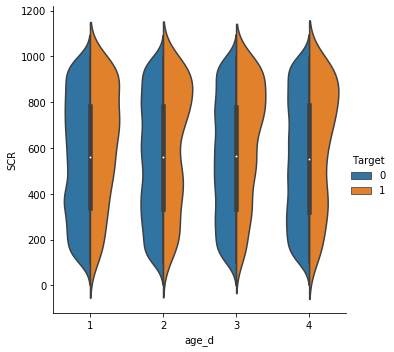

In [66]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

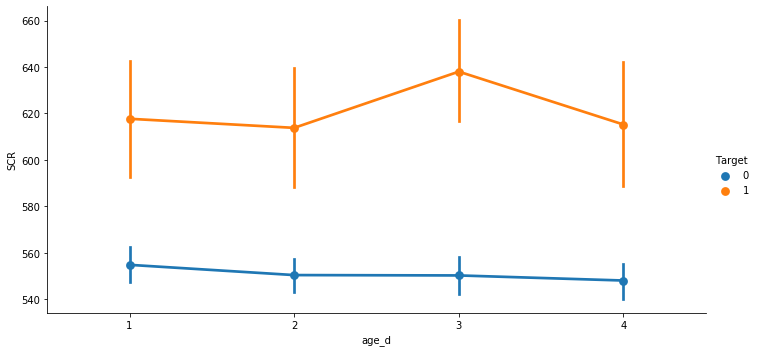

In [67]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, aspect=2.0, kind = "point")
plt.show()

##### Inferences: 

- The `Age groups` `(20.9-30] years` and `(38-46] years` tend to showwcase higher `SCR` values hence more interest towards opting for lonans. However, the age groups (30-38] and (46.0-55) showcase least interest in opting for loans.

### SCR Vs Age-Category Vs Target

KeyboardInterrupt: 

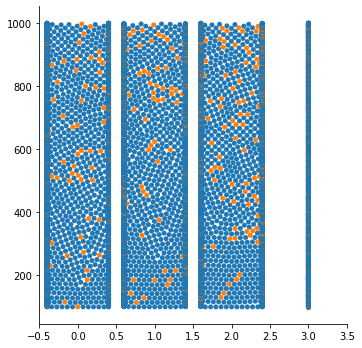

In [68]:
sns.catplot(x="age_d", y="SCR", hue = "Target",data=data1, kind = "swarm")
plt.show()

In [69]:
sns.set_style('ticks')

### BUCKETING SCR & HOLDING PERIODS

In [70]:
data1['SCRb'] = pd.qcut(data['SCR'], q=5)

In [71]:
data1.SCRb.value_counts()

(99.999, 288.0]    3987
(468.0, 651.0]     3964
(826.0, 999.0]     3956
(651.0, 826.0]     3952
(288.0, 468.0]     3945
Name: SCRb, dtype: int64

In [72]:
data1['HPB'] = pd.qcut(data['Holding_Period'], q=4)

In [73]:
data1.HPB.value_counts()

(0.999, 8.0]    5519
(16.0, 23.0]    4998
(8.0, 16.0]     4791
(23.0, 31.0]    4496
Name: HPB, dtype: int64

In [74]:
data1.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,"Ageb_(20.999, 30.0]","Ageb_(30.0, 38.0]","Ageb_(38.0, 46.0]","Ageb_(46.0, 55.0]",age_d,SCRb,HPB
0,0,41,91519,38,926,15,0,1,0,0,1,0,0,0,1,0,3,"(826.0, 999.0]","(8.0, 16.0]"
1,0,52,117288,17,768,13,0,1,0,1,0,0,0,0,0,1,4,"(651.0, 826.0]","(8.0, 16.0]"
2,0,31,259827,8,816,5,1,0,0,0,0,1,0,1,0,0,2,"(651.0, 826.0]","(0.999, 8.0]"
3,0,45,26677,14,353,18,1,0,1,0,0,0,0,0,1,0,3,"(288.0, 468.0]","(16.0, 23.0]"
4,0,39,43440,1,751,31,1,0,0,0,0,1,0,0,1,0,3,"(651.0, 826.0]","(23.0, 31.0]"


### SCR-Bucketed Vs Age-Category Vs Target

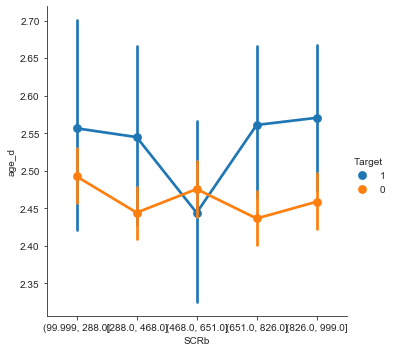

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [75]:
sns.catplot(x="SCRb", y="age_d", hue = "Target",data=data1, kind = "point", split = True, hue_order=[1,0])
plt.show()
plt.figure(figsize=(10,10))

In [ ]:
sns.catplot(x="age_d", y="SCRb", hue = "Target",data=data1, kind = "swarm")
plt.show()

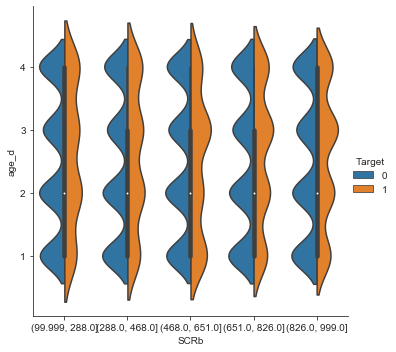

In [77]:
sns.catplot(x="SCRb", y="age_d", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

##### Inferences: 

- People in the `Age Group` `(46.0, 55.0]` years tend to have higher `SCR` score i.e. 826 to 1000 points and opt for loans as compared to `(30.0, 38.0]` years who stand at the second position for higher `SCR` values i.e. 650 to 830 points.

- People in the `Age Group` `(38.0, 46.0]` years tend to have `SCR` values between 400 to 650 points.

### Holding Period Bucketed Vs Age-Category Vs Target

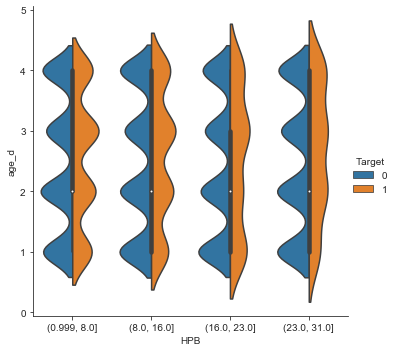

In [78]:
sns.catplot(x="HPB", y="age_d", hue = "Target",data=data1, kind = "violin", split = True)
plt.show()

##### Inferences: 

- Higher the `Holding Period` more stable is the money in the person's account. 
- `Holding Period` of 23-31 weeks tends to be uniform across all the `Age Groups`
- `Holding Period` between 1-8 weeks tends to lie in the `Age Groups` = 2 and 3 i.e. (30.0, 38.0] and (38.0, 46.0]

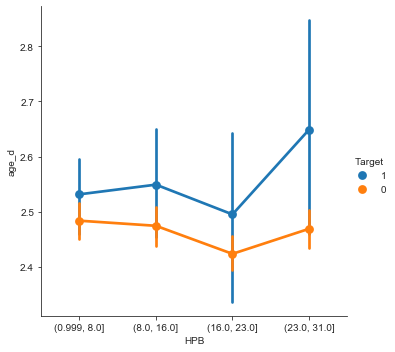

In [79]:
sns.catplot(x="HPB", y="age_d", hue = "Target",data=data1, kind = "point", hue_order=[1,0])
plt.show()

### Pair-Plot on Bucketed Data

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

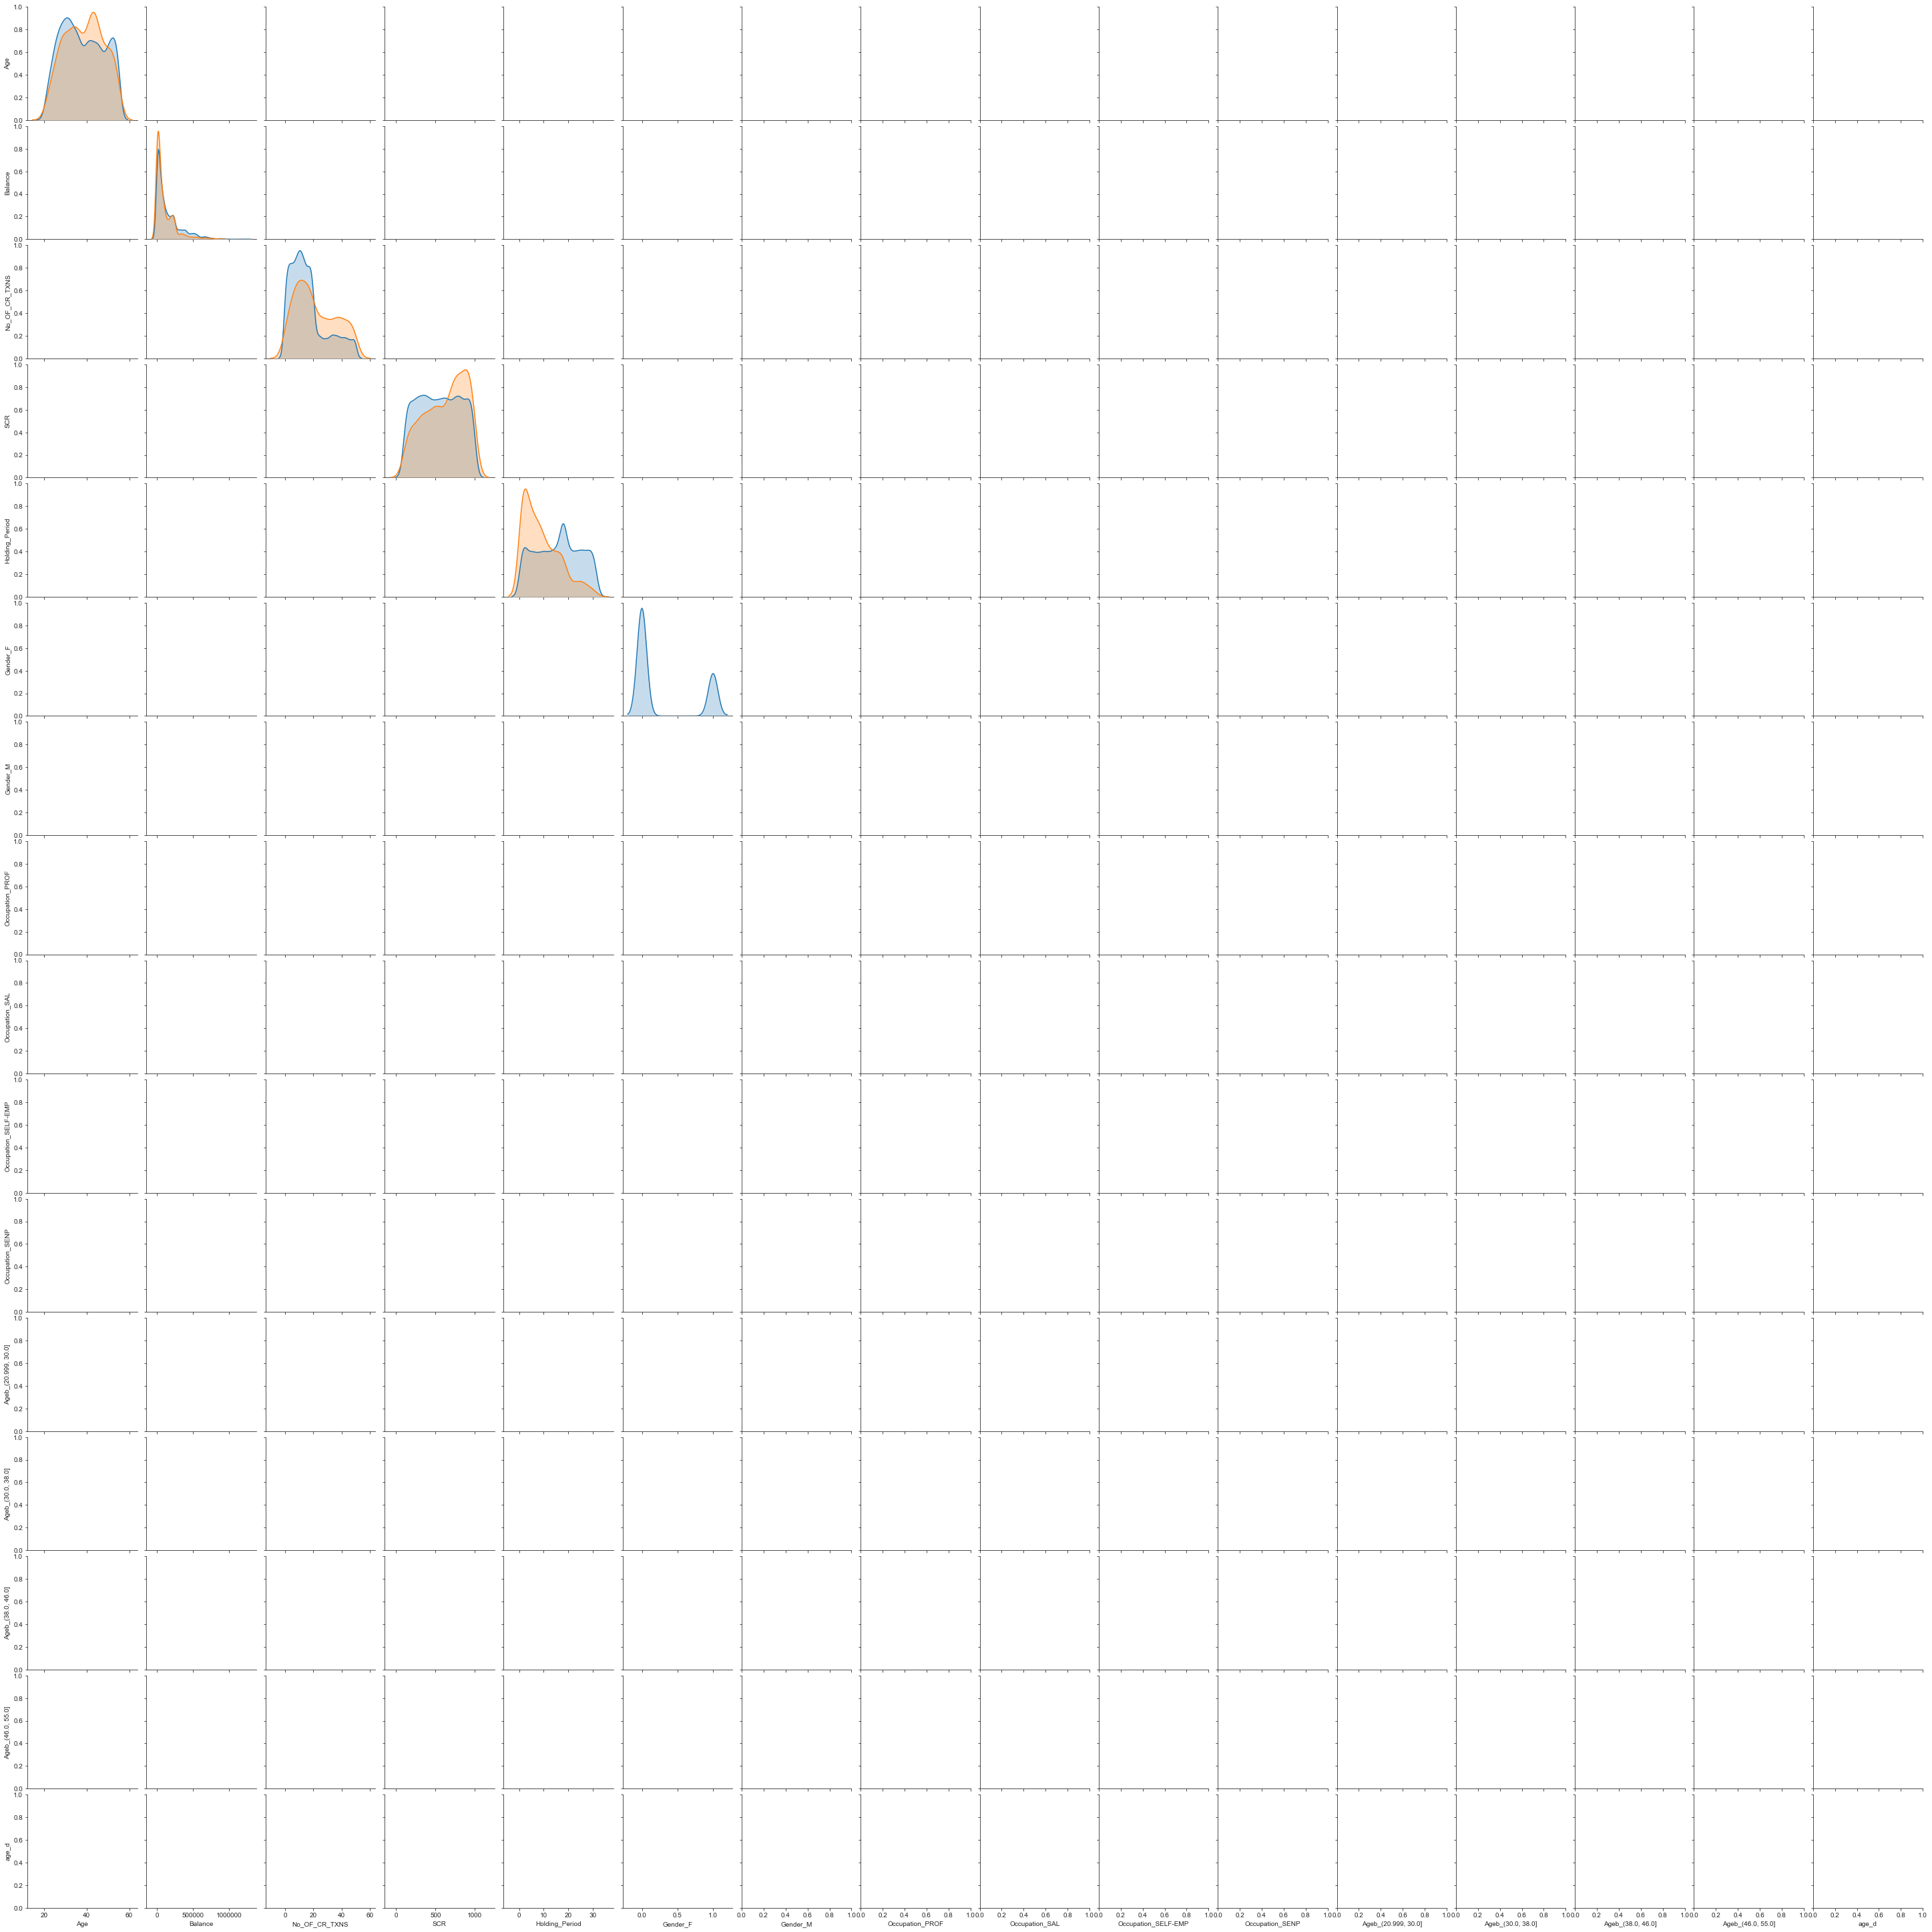

In [84]:
# sns.pairplot(data1, hue = 'Target')
# plt.show()

##### Inferences from Pair-Plot: 

- People who tend to opt for loan have less `BALANCE` w.r.t people not buying loan.
- People having higher `BALANCE` tend to be in between 35-50 years of `AGE`.
- People having less `BALANCE` tend to show more interest towards loans i.e. higher `SCR` values.
- People having less `BALANCE` tend to have higher `No of Credit transactions` opt for loans.
- People having less `BALANCE` have higher `HOLDING PERIOD` who opt for loans.

------

## Model Evaluation Matrix - Which Models to be Considered?

In [81]:
model_eval = {'Sensitivity%': ['10.9','9.84','19.6','17.2','8.6','18.4','11.4','25.0','25.0','16.4','20.8','17.2'],
        'Comments': ['Not Considering','Not Considering','Not Considering','Not Considering','Not Considering','Not Considering',
                     'Not Considering','Considering','Considering','Not Considering','Considering','Not Considering',]
        }

df1 = pd.DataFrame(model_eval, columns = ['Sensitivity%','Comments'], index=['DecisionTreeClassifier - Original Data','DecisionTreeClassifier - UnderSampled Data','DecisionTreeClassifier - OverSampled Data',
                                                                           'KNN Classifier - Original Data','KNN Classifier - Undersampled Data','Random Forest Classifier - Original Data','RandomForest Classifier - Undersampled Data',
                                                                           'RandomForest Classifier - Oversampled Data','Logistic Regression - Original Data','Logistic Regression - Undersampled Data',
                                                                          'Logistic Regression - Oversampled Data','KNN Classifier - Oversampled Data'])

print (df1)

                                            Sensitivity%         Comments
DecisionTreeClassifier - Original Data              10.9  Not Considering
DecisionTreeClassifier - UnderSampled Data          9.84  Not Considering
DecisionTreeClassifier - OverSampled Data           19.6  Not Considering
KNN Classifier - Original Data                      17.2  Not Considering
KNN Classifier - Undersampled Data                   8.6  Not Considering
Random Forest Classifier - Original Data            18.4  Not Considering
RandomForest Classifier - Undersampled Data         11.4  Not Considering
RandomForest Classifier - Oversampled Data          25.0      Considering
Logistic Regression - Original Data                 25.0      Considering
Logistic Regression - Undersampled Data             16.4  Not Considering
Logistic Regression - Oversampled Data              20.8      Considering
KNN Classifier - Oversampled Data                   17.2  Not Considering


In [82]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_original.values, i) for i in range(X_original.shape[1])]
vif["features"] = X_original.columns

In [83]:
vif.round(3)

,VIF Factor,features
0,8.749,Age
1,1.699,Balance
2,2.866,No_OF_CR_TXNS
3,4.764,SCR
4,3.553,Holding_Period
5,3.850,Gender_M
6,2.083,Occupation_SAL
7,1.542,Occupation_SELF-EMP
8,1.886,Occupation_SENP


### ------------------------------------------------------------End of Capstone---------------------------------------------------------------------
-----------